In [1]:
%matplotlib notebook

/Users/guyer/anaconda/envs/parallel2/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from matplotlib import pyplot as plt

In [3]:
import datreant.core as dtr

In [4]:
import fipy as fp

In [40]:
def plotFields(xVelocity, yVelocity, pressure, maskEllipse=False):
    fig = plt.figure(figsize=(10, 9))
    
#    fig.text(.5, .95, "t = {}".format(t), horizontalalignment='center', verticalalignment='center', fontsize=18)
    
    ax1 = plt.axes([.1, .8, .8, .16])
    ax1x = plt.axes([.1, .7, .64, .05])
    ax1y = plt.axes([.94, .8, .05, .16])
    
    ax2 = plt.axes([.1, .5, .8, .16])
    ax2x = plt.axes([.1, .4, .64, .05])
    ax2y = plt.axes([.94, .5, .05, .16])
    
    ax3 = plt.axes([.1, .2, .8, .16])
    ax3x = plt.axes([.1, .1, .64, .05])
    ax3y = plt.axes([.94, .2, .05, .16])
    
    fp.Viewer(vars=xVelocity, datamin=0., datamax=0.025, axes=ax1).plot()
    fp.Viewer(vars=yVelocity, datamin=0., datamax=0.025, axes=ax2).plot()
    fp.Viewer(vars=pressure, axes=ax3).plot()
    
    xx = fp.numerix.linspace(0, 30)
    yy = fp.numerix.zeros(xx.shape)
    yy[:] = 5.
    cc = fp.numerix.array((xx, yy))

    ux = xVelocity(cc, order=1)
    uy = yVelocity(cc, order=1)
    p = pressure(cc, order=1)
    
    ax1x.plot(xx, ux)
    ax1x.set_ylim(0, 0.025)
    ax1x.set_ylabel(r"$u_x$")
    ax2x.plot(xx, uy)
    ax2x.set_ylim(-0.01, 0.015)
    ax2x.set_ylabel(r"$u_y$")
    ax3x.plot(xx, p)
    ax3x.set_ylabel(r"$p$")
    
    yy = fp.numerix.linspace(0, 6)
    xx = fp.numerix.zeros(yy.shape)
    xx[:] = 7.
    cc = fp.numerix.array((xx, yy))

    ux = xVelocity(cc, order=1)
    uy = yVelocity(cc, order=1)
    p = pressure(cc, order=1)
    if maskEllipse:
        for v in [ux, uy, p]:
            v[(yy > 1) & (yy < 4)] = fp.numerix.nan
    ax1y.plot(ux, yy)
    ax1y.set_xlim(0, 0.025)
    ax1y.set_xlabel(r"$u_x$")
    ax2y.plot(uy, yy)
    ax2y.set_xlim(-0.01, 0.015)
    ax2y.set_xlabel(r"$u_y$")
    ax3y.plot(p, yy)
    ax3y.set_xlabel(r"$p$")

In [63]:
data = dtr.Treant("Data/917852af-402e-4644-aac1-d80cc8254f33")
data.categories['elapsed']

165.573173

In [64]:
data = dtr.Treant("Data/31c7e4d5-076c-45f0-a3c8-58b08acc6419")
data.categories['elapsed']

386.76655100000005

In [65]:
data = dtr.Treant("Data/2116d0f8-c540-49fe-9509-c50bdd32e197")
data.categories['elapsed']

1915.7012419999999

In [66]:
data = dtr.Treant("Data/75029e94-f84f-4a92-bff2-440af97b0201")
data.categories['elapsed']

160.09153799999999

In [67]:
data = dtr.Treant("Data/3b4a523e-7162-4d2b-a01d-0c7b03edef77")
data.categories['elapsed']

237.087075

In [68]:
data = dtr.Treant("Data/c58a3fb5-2d64-4063-88de-4e3d2f5e8e86")
data.categories['elapsed']

650.54385

<IPython.core.display.Javascript object>


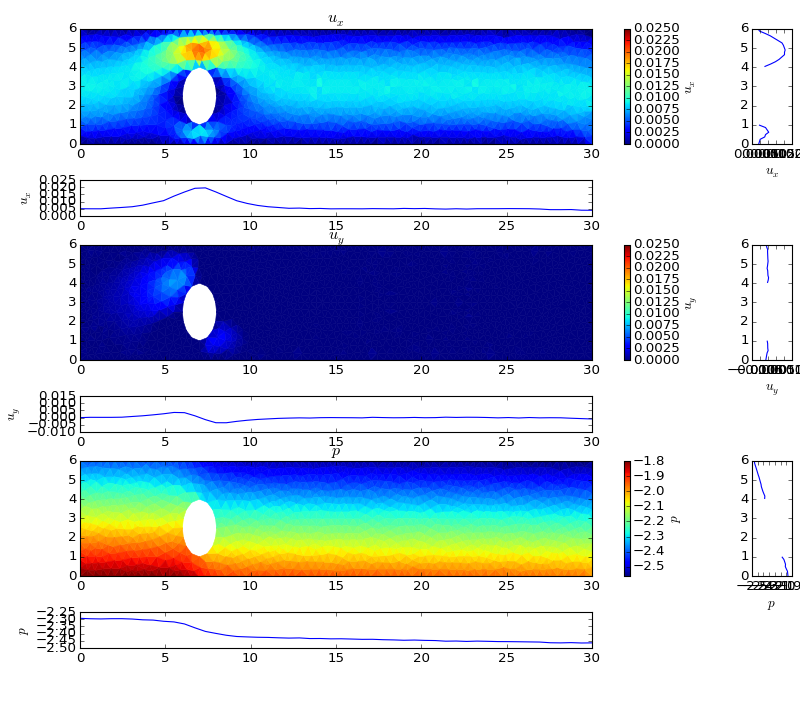

In [49]:
data = dtr.Treant("Data/917852af-402e-4644-aac1-d80cc8254f33")

data.categories["args"]

xVelocity, yVelocity, velocity, pressure = fp.dump.read(filename=data["sweep={}.tar.gz".format(2000)].abspath)

plotFields(xVelocity, yVelocity, pressure, maskEllipse=True)

<IPython.core.display.Javascript object>


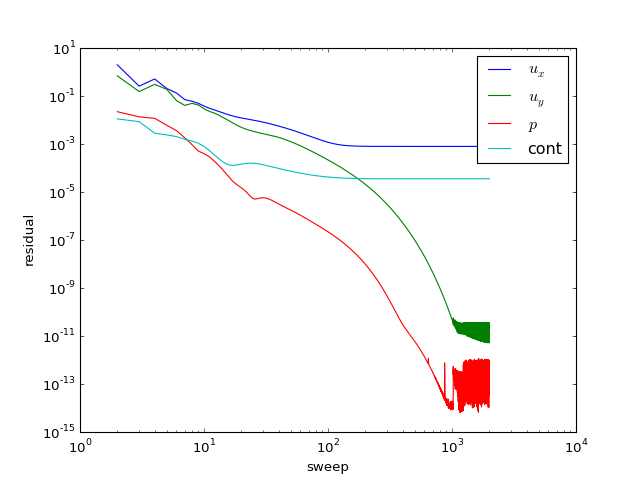

In [50]:
sweeps, xres, yres, pres, cont = fp.numerix.loadtxt(data["residuals.txt"].abspath, unpack=True, skiprows=1)

plt.figure()
plt.loglog(sweeps, xres, label=r"$u_x$")
plt.loglog(sweeps, yres, label=r"$u_y$")
plt.loglog(sweeps, pres, label=r"$p$")
plt.loglog(sweeps, cont, label=r"cont")
plt.legend()
plt.ylabel("residual")
plt.xlabel("sweep")

plt.savefig(data["residuals.png"].make().abspath)

<IPython.core.display.Javascript object>


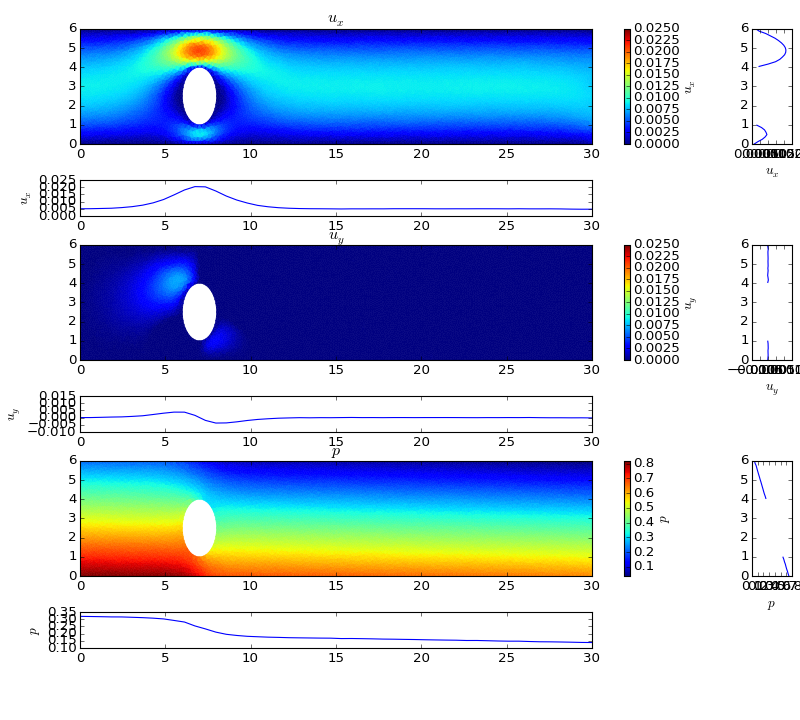

In [47]:
data = dtr.Treant("Data/31c7e4d5-076c-45f0-a3c8-58b08acc6419")

data.categories["args"]

xVelocity, yVelocity, velocity, pressure = fp.dump.read(filename=data["sweep={}.tar.gz".format(2000)].abspath)

plotFields(xVelocity, yVelocity, pressure, maskEllipse=True)

<IPython.core.display.Javascript object>


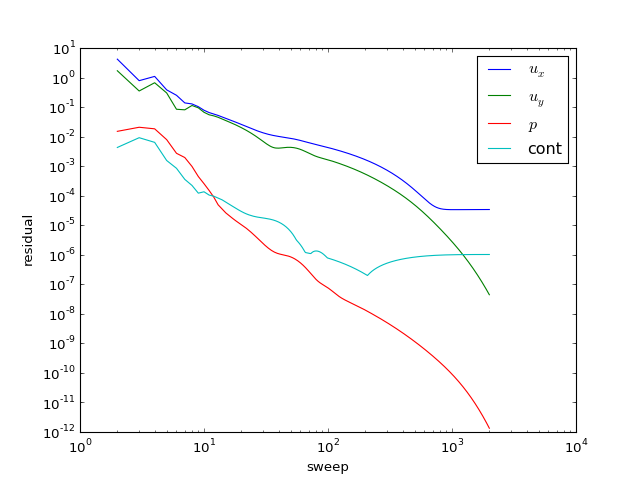

In [48]:
sweeps, xres, yres, pres, cont = fp.numerix.loadtxt(data["residuals.txt"].abspath, unpack=True, skiprows=1)

plt.figure()
plt.loglog(sweeps, xres, label=r"$u_x$")
plt.loglog(sweeps, yres, label=r"$u_y$")
plt.loglog(sweeps, pres, label=r"$p$")
plt.loglog(sweeps, cont, label=r"cont")
plt.legend()
plt.ylabel("residual")
plt.xlabel("sweep")

plt.savefig(data["residuals.png"].make().abspath)

<IPython.core.display.Javascript object>


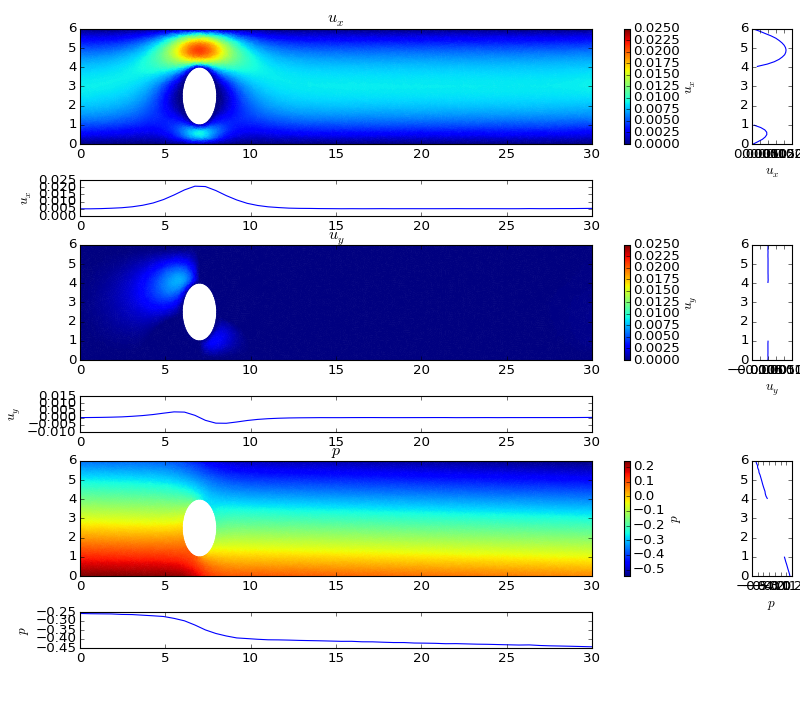

In [51]:
data = dtr.Treant("Data/2116d0f8-c540-49fe-9509-c50bdd32e197")

data.categories["args"]

xVelocity, yVelocity, velocity, pressure = fp.dump.read(filename=data["sweep={}.tar.gz".format(2000)].abspath)

plotFields(xVelocity, yVelocity, pressure, maskEllipse=True)

<IPython.core.display.Javascript object>


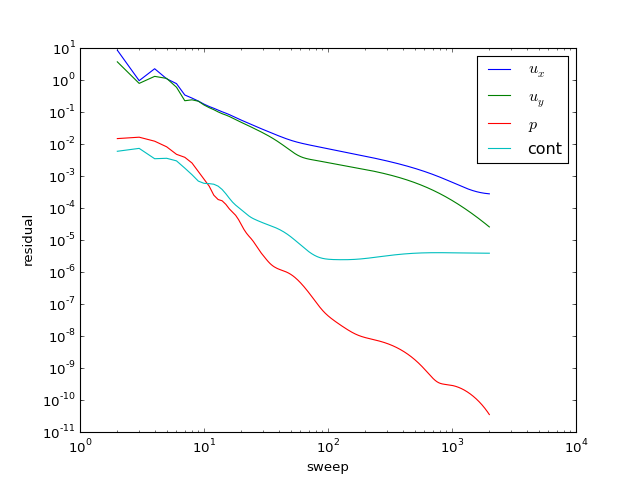

In [52]:
sweeps, xres, yres, pres, cont = fp.numerix.loadtxt(data["residuals.txt"].abspath, unpack=True, skiprows=1)

plt.figure()
plt.loglog(sweeps, xres, label=r"$u_x$")
plt.loglog(sweeps, yres, label=r"$u_y$")
plt.loglog(sweeps, pres, label=r"$p$")
plt.loglog(sweeps, cont, label=r"cont")
plt.legend()
plt.ylabel("residual")
plt.xlabel("sweep")

plt.savefig(data["residuals.png"].make().abspath)

/Users/guyer/anaconda/envs/parallel2/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


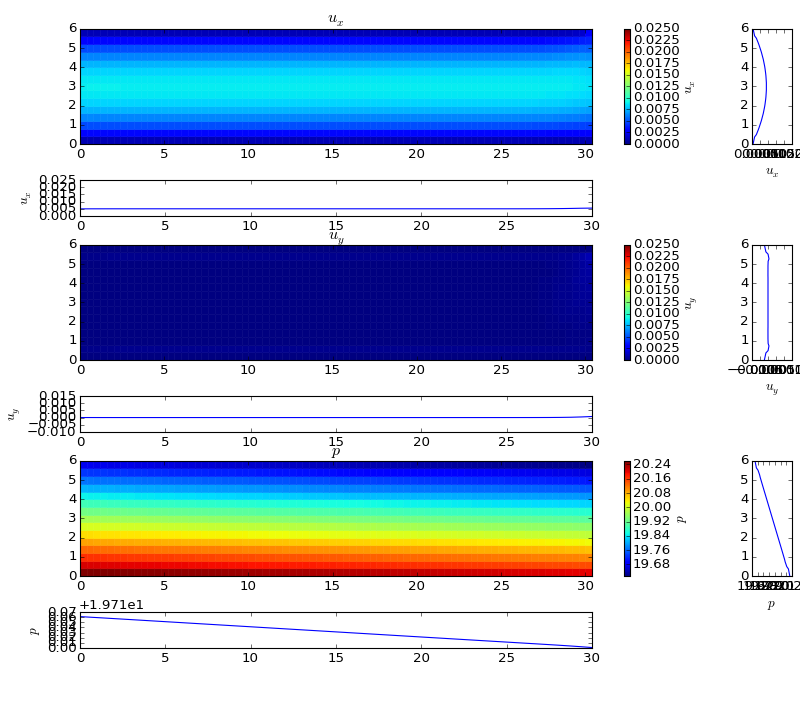

In [55]:
data = dtr.Treant("Data/75029e94-f84f-4a92-bff2-440af97b0201")

data.categories["args"]

xVelocity, yVelocity, velocity, pressure = fp.dump.read(filename=data["sweep={}.tar.gz".format(2000)].abspath)

plotFields(xVelocity, yVelocity, pressure, maskEllipse=False)

<IPython.core.display.Javascript object>


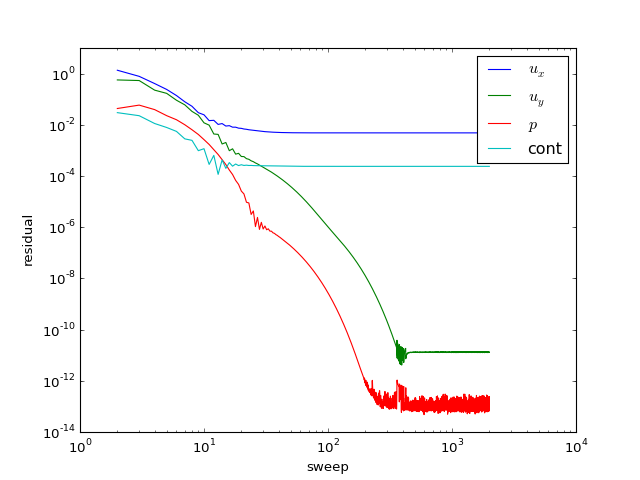

In [56]:
sweeps, xres, yres, pres, cont = fp.numerix.loadtxt(data["residuals.txt"].abspath, unpack=True, skiprows=1)

plt.figure()
plt.loglog(sweeps, xres, label=r"$u_x$")
plt.loglog(sweeps, yres, label=r"$u_y$")
plt.loglog(sweeps, pres, label=r"$p$")
plt.loglog(sweeps, cont, label=r"cont")
plt.legend()
plt.ylabel("residual")
plt.xlabel("sweep")

plt.savefig(data["residuals.png"].make().abspath)

<IPython.core.display.Javascript object>


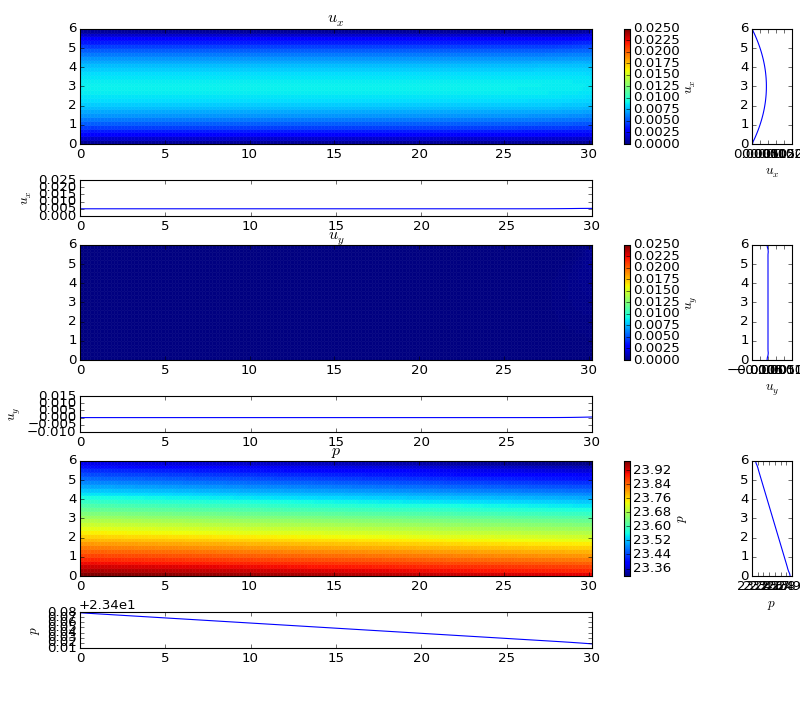

In [57]:
data = dtr.Treant("Data/3b4a523e-7162-4d2b-a01d-0c7b03edef77")

data.categories["args"]

xVelocity, yVelocity, velocity, pressure = fp.dump.read(filename=data["sweep={}.tar.gz".format(2000)].abspath)

plotFields(xVelocity, yVelocity, pressure, maskEllipse=False)

<IPython.core.display.Javascript object>


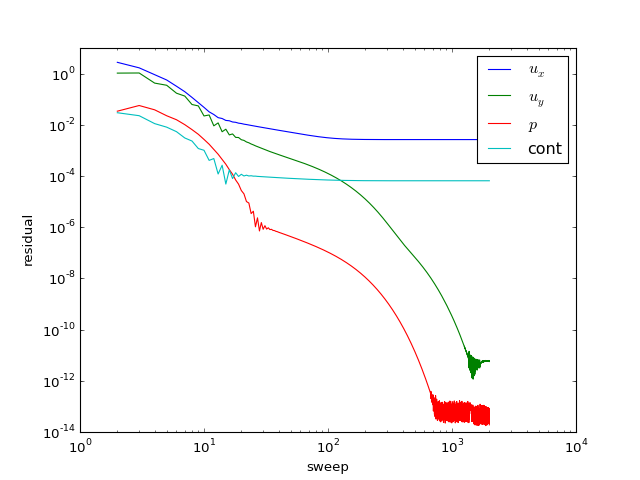

In [59]:
sweeps, xres, yres, pres, cont = fp.numerix.loadtxt(data["residuals.txt"].abspath, unpack=True, skiprows=1)

plt.figure()
plt.loglog(sweeps, xres, label=r"$u_x$")
plt.loglog(sweeps, yres, label=r"$u_y$")
plt.loglog(sweeps, pres, label=r"$p$")
plt.loglog(sweeps, cont, label=r"cont")
plt.legend()
plt.ylabel("residual")
plt.xlabel("sweep")

plt.savefig(data["residuals.png"].make().abspath)

<IPython.core.display.Javascript object>


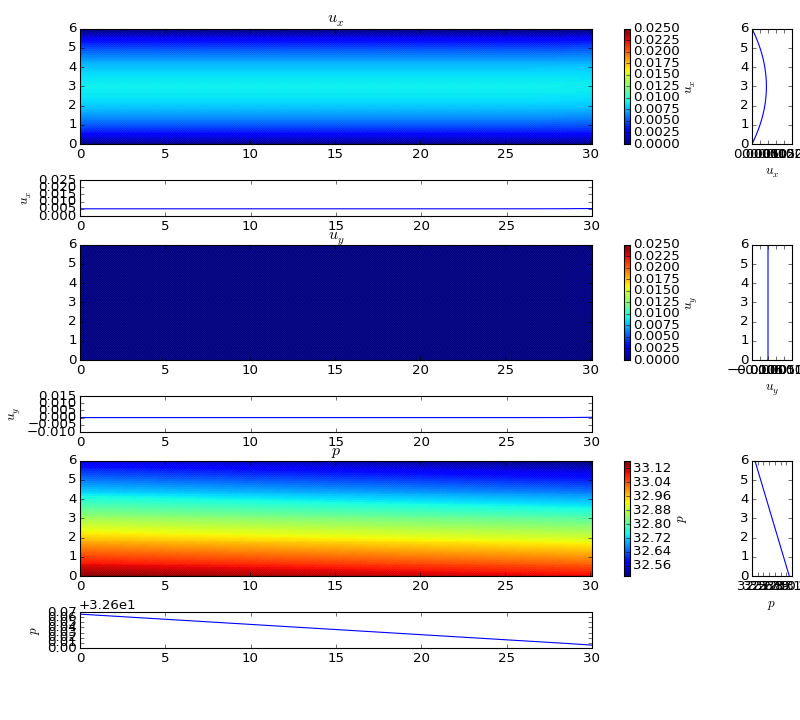

In [60]:
data = dtr.Treant("Data/c58a3fb5-2d64-4063-88de-4e3d2f5e8e86")

data.categories["args"]

xVelocity, yVelocity, velocity, pressure = fp.dump.read(filename=data["sweep={}.tar.gz".format(2000)].abspath)

plotFields(xVelocity, yVelocity, pressure, maskEllipse=False)

<IPython.core.display.Javascript object>


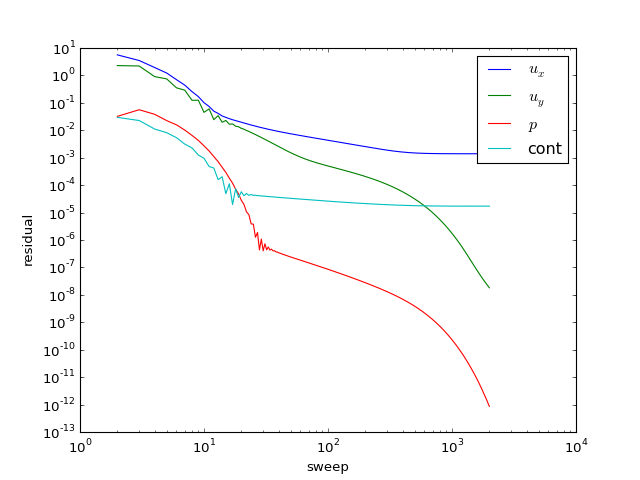

In [61]:
sweeps, xres, yres, pres, cont = fp.numerix.loadtxt(data["residuals.txt"].abspath, unpack=True, skiprows=1)

plt.figure()
plt.loglog(sweeps, xres, label=r"$u_x$")
plt.loglog(sweeps, yres, label=r"$u_y$")
plt.loglog(sweeps, pres, label=r"$p$")
plt.loglog(sweeps, cont, label=r"cont")
plt.legend()
plt.ylabel("residual")
plt.xlabel("sweep")

plt.savefig(data["residuals.png"].make().abspath)

In [54]:
!ls Data/ba28c4b0-967e-4ab0-b9a5-dec9d26fde68/

Treant.07cae2cf-92c7-4739-9025-de867a1f7459.json
p@1900.png
p@700.png
residuals.npy
residuals.txt
sweep=0.tar.gz
sweep=100.tar.gz
sweep=1000.tar.gz
sweep=1100.tar.gz
sweep=1200.tar.gz
sweep=1300.tar.gz
sweep=1400.tar.gz
sweep=1500.tar.gz
sweep=1600.tar.gz
sweep=1700.tar.gz
sweep=1800.tar.gz
sweep=1900.tar.gz
sweep=200.tar.gz
sweep=300.tar.gz
sweep=400.tar.gz
sweep=500.tar.gz
sweep=600.tar.gz
sweep=700.tar.gz
sweep=800.tar.gz
sweep=900.tar.gz
ux@1900.png
ux@700.png
uy@1900.png
uy@700.png
v@1900.png
v@700.png
x=7@1900.png
x=7@1900.txt
x=7@700.png
x=7@700.txt


In [62]:
data.categories["elapsed"]

650.54385

In [6]:
data.draw()

2116d0f8-c540-49fe-9509-c50bdd32e197/
 +-- residuals.npy
 +-- sweep=400.tar.gz
 +-- p@2000.png
 +-- sweep=700.tar.gz
 +-- sweep=500.tar.gz
 +-- sweep=900.tar.gz
 +-- sweep=1600.tar.gz
 +-- sweep=100.tar.gz
 +-- y=5@2000.txt
 +-- mprofile_20170801122003.dat
 +-- sweep=1500.tar.gz
 +-- uy@2000.png
 +-- sweep=1100.tar.gz
 +-- residuals.txt
 +-- sweep=1800.tar.gz
 +-- v@2000.png
 +-- sweep=1200.tar.gz
 +-- sweep=1000.tar.gz
 +-- sweep=1700.tar.gz
 +-- sweep=2000.tar.gz
 +-- sweep=1900.tar.gz
 +-- sweep=1400.tar.gz
 +-- residuals.png
 +-- sweep=200.tar.gz
 +-- sweep=800.tar.gz
 +-- Treant.6ab2256d-8d96-4e3b-8f00-c393e74ec2db.json
 +-- ux@2000.png
 +-- sweep=1300.tar.gz
 +-- sweep=300.tar.gz
 +-- sweep=0.tar.gz
 +-- y=5@2000.png
 +-- sweep=600.tar.gz


<IPython.core.display.Javascript object>


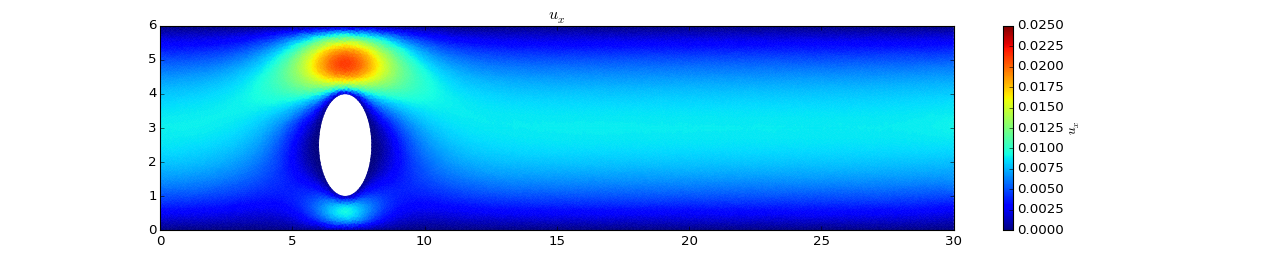

<IPython.core.display.Javascript object>


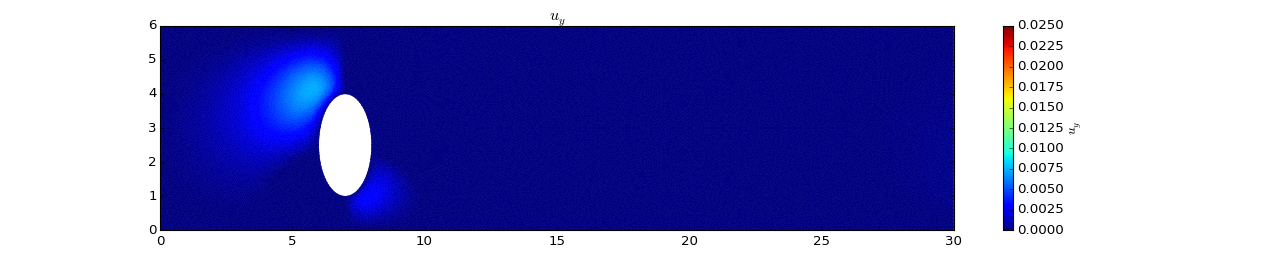

<IPython.core.display.Javascript object>


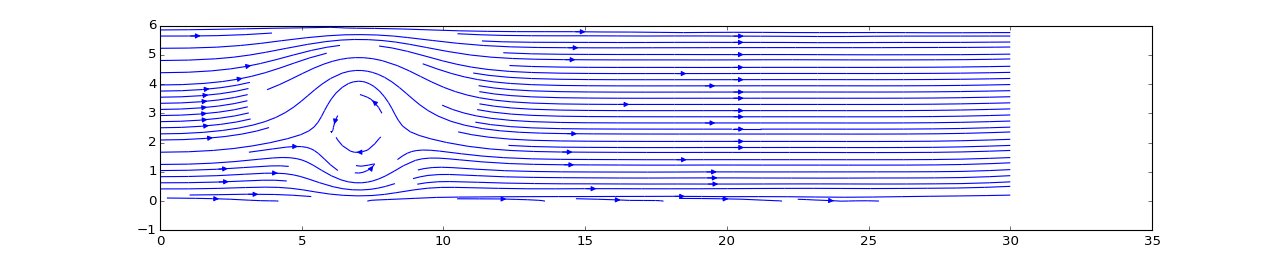

<IPython.core.display.Javascript object>


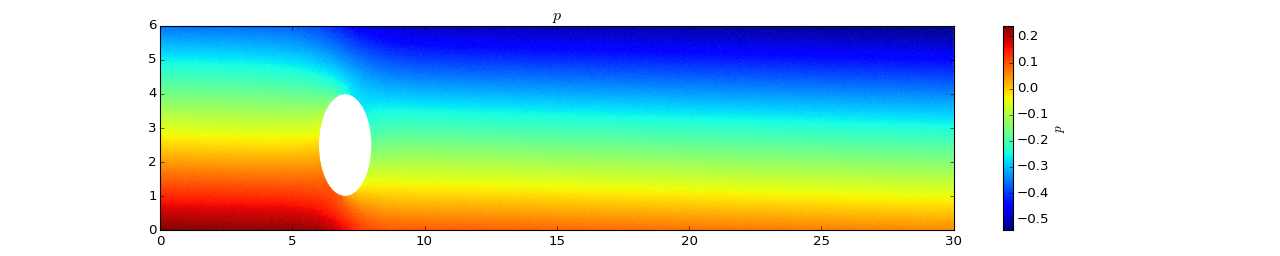

In [89]:
sweep = 2000

xVelocity, yVelocity, velocity, pressure = fp.dump.read(filename=data["sweep={}.tar.gz".format(sweep)].abspath)

fp.Viewer(vars=xVelocity, datamin=0., datamax=0.025).plot(filename=data["ux@{}.png".format(sweep)].make().abspath)
fp.Viewer(vars=yVelocity, datamin=0., datamax=0.025).plot(filename=data["uy@{}.png".format(sweep)].make().abspath)
fp.MatplotlibStreamViewer(vars=velocity).plot(data["v@{}.png".format(sweep)].make().abspath)
fp.Viewer(vars=pressure).plot(data["p@{}.png".format(sweep)].make().abspath)

In [90]:
data.categories["notes"] = """High resolution
Deflects "down" a bit at outlet
Gravity is "up"
"""

In [17]:
def inlet(yy):
    return -0.001 * (yy - 3)**2 + 0.009

<IPython.core.display.Javascript object>


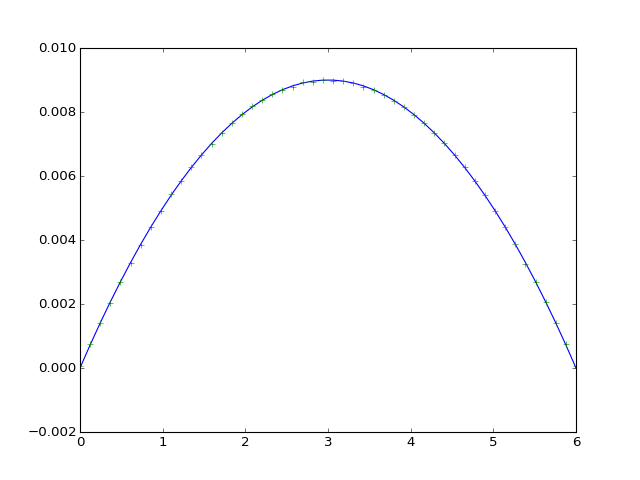

In [91]:
yy = fp.numerix.linspace(0, 6)
xx = fp.numerix.zeros(yy.shape)
cc = fp.numerix.array((xx, yy))

plt.figure()
plt.plot(yy, inlet(yy))
# plt.plot(yy, xVelocity(cc), linestyle="", marker="x")
plt.plot(yy, xVelocity(cc, order=1), linestyle="", marker="+")

<IPython.core.display.Javascript object>


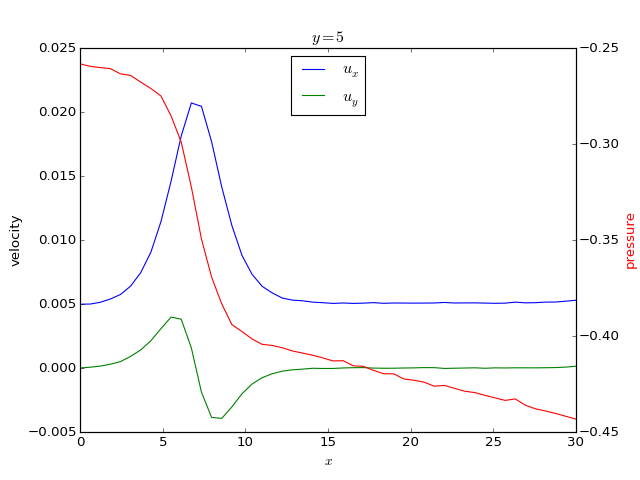

In [92]:
xx = fp.numerix.linspace(0, 30)
yy = fp.numerix.zeros(xx.shape)
yy[:] = 5.
cc = fp.numerix.array((xx, yy))

plt.figure()
plt.title("$y = 5$")

ax1 = plt.axes()
ax2 = ax1.twinx()

ux = xVelocity(cc, order=1)
uy = yVelocity(cc, order=1)
p = pressure(cc, order=1)
ax1.plot(xx, ux, label=r"$u_x$")
ax1.plot(xx, uy, label=r"$u_y$")

ax1.legend(loc="upper center")

ax1.set_xlabel("$x$")
ax1.set_ylabel("velocity")

ax2.plot(xx, p, label=r"$p$", color="red")
ax2.set_ylabel("pressure", color="red")

plt.savefig(data["y=5@{}.png".format(sweep)].make().abspath)

fp.numerix.savetxt(fname=data["y=5@{}.txt".format(sweep)].make().abspath,
                   X=fp.numerix.array((xx, ux, uy, p)).swapaxes(0,1),
                   header="x\tux\tuy\tp\n")

<IPython.core.display.Javascript object>


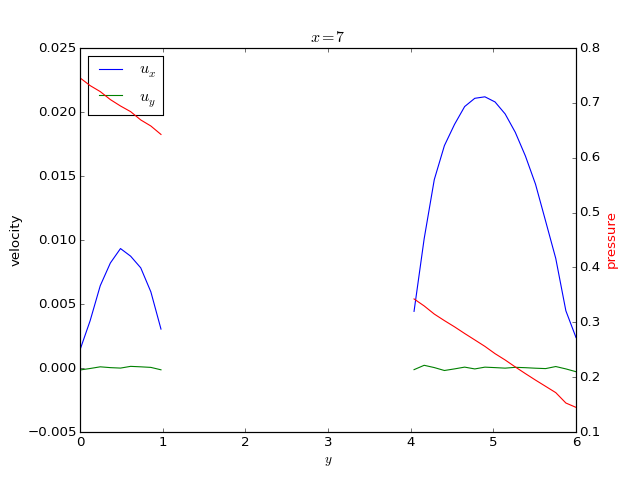

In [80]:
yy = fp.numerix.linspace(0, 6)
xx = fp.numerix.zeros(yy.shape)
xx[:] = 7.
cc = fp.numerix.array((xx, yy))

plt.figure()
plt.title("$x = 7$")

ax1 = plt.axes()
ax2 = ax1.twinx()

ux = xVelocity(cc, order=1)
uy = yVelocity(cc, order=1)
p = pressure(cc, order=1)
for v in [ux, uy, p]:
    v[(yy > 1) & (yy < 4)] = fp.numerix.nan
ax1.plot(yy, ux, label=r"$u_x$")
ax1.plot(yy, uy, label=r"$u_y$")

ax1.legend(loc="upper left")

ax1.set_xlabel("$y$")
ax1.set_ylabel("velocity")

ax2.plot(yy, p, label=r"$p$", color="red")
ax2.set_ylabel("pressure", color="red")

plt.savefig(data["x=7@{}.png".format(sweep)].make().abspath)

fp.numerix.savetxt(fname=data["x=7@{}.txt".format(sweep)].make().abspath,
                   X=fp.numerix.array((yy, ux, uy, p)).swapaxes(0,1),
                   header="y\tux\tuy\tp\n")

In [ ]:
    ax1 = plt.axes([0.1, .35, .4, .55])
    ax2 = plt.axes([.55, .35, .4, .55])
    fp.Viewer(vars=c, axes=ax1, datamin=0, datamax=1).plot() #filename=data["c@t={}.png".format(t)].make().abspath)
    fp.Viewer(vars=Phi, axes=ax2, datamin=-1, datamax=1).plot(filename=data["c_Phi@t={}.png".format(t)].make().abspath)
    
    xx = fp.numerix.linspace(0, 100)
    yy = fp.numerix.zeros(xx.shape)
    yy[:] = 50.
    cc = fp.numerix.array((xx, yy))

#    plt.figure()
#    plt.title("$y = 50, t = {}$".format(t))

    ax3 = plt.axes([0.1, 0.1, .32, .2])
    ax4 = plt.axes([0.55, 0.1, .32, .2])
    
    c_line = c(cc, order=1)
    Phi_line = Phi(cc, order=1)

    ax3.plot(xx, c_line, label=r"$c$", color="blue")

    ax3.set_xlabel("$x$")
    ax3.set_ylabel("$c$", color="blue")
    ax3.set_ylim(0., 1.)

    ax4.plot(xx, Phi_line, label=r"$\Phi$", color="red")
    ax4.set_ylabel(r"$\Phi$", color="red")
    ax4.set_ylim(0, 1.)

    plt.savefig(data["t={}.png".format(t)].make().abspath)

    fp.numerix.savetxt(fname=data["y=50@t={}.txt".format(t)].make().abspath,
                       X=fp.numerix.array((xx, c_line, Phi_line)).swapaxes(0,1),
                       header="x\tc\tPhi\n")

<IPython.core.display.Javascript object>


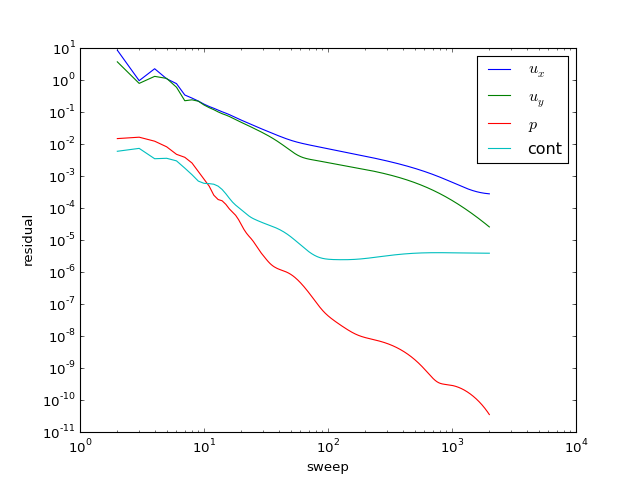

In [93]:
sweeps, xres, yres, pres, cont = fp.numerix.loadtxt(data["residuals.txt"].abspath, unpack=True, skiprows=1)

plt.figure()
plt.loglog(sweeps, xres, label=r"$u_x$")
plt.loglog(sweeps, yres, label=r"$u_y$")
plt.loglog(sweeps, pres, label=r"$p$")
plt.loglog(sweeps, cont, label=r"cont")
plt.legend()
plt.ylabel("residual")
plt.xlabel("sweep")

plt.savefig(data["residuals.png"].make().abspath)

In [81]:
print "dx = {}".format(data.categories['dx'])
print "dy = {}".format(data.categories['dy'])
print "elapsed = {} s".format(data.categories['elapsed'])

KeyError: 'dx'

In [94]:
print "dx = {}".format(data.categories['cellSize'])
print "elapsed = {} s".format(data.categories['elapsed'])

dx = 0.1
elapsed = 1915.701242 s


In [ ]:
b = dtr.discover('Data')

In [ ]:
b.categories['args']

In [10]:
III1a = b[["problem" in t.categories and t.categories['problem'] == "III-1a" for t in b]]

In [ ]:
III1a.categories['args']

In [ ]:
III1a.categories['notes']

In [ ]:
III1a.categories['commit']

In [ ]:
III1a.filepaths

In [15]:
160*1024

163840

In [75]:
import numpy as np

In [76]:
def calcN(deltaX, dx0, f):
    return np.log(1 - (deltaX/dx0)*(1-f)) / np.log(f)

In [77]:
calcN(deltaX=1., dx0=0.1, f=1.3)

5.2838535916222806

In [78]:
0.1 + 0.1 * 1.3 + 0.1 * 1.3**2 + 0.1 * 1.3**3 + 0.1 * 1.3**4

0.9043100000000002

In [79]:
(1 - 1.3**10) / (1 - 1.3)

42.61949728300001

In [80]:
1 / (1 - 1.3)

-3.333333333333333

In [81]:
np.log(.1) / np.log(.55)

3.8515265700914352

In [82]:
(1 - .55**3.85) / (1 - .55)

1.9997970985183136

In [83]:
.1**.25

0.5623413251903491

In [85]:
(1 - 0.5623413251903491**4) / (1 - 0.5623413251903491)

2.056397032211079

In [86]:
.1**.1

0.7943282347242815

In [87]:
(1 - 0.7943282347242815**10) / (1 - 0.7943282347242815)

4.375904484475456

In [88]:
from scipy.optimize import fsolve

In [89]:
def fn(f, N):
    return np.log(2*f - 1) - N * np.log(f)

In [100]:
def fn2(f, N):
    return (1 - f**N) / (1 - f) - 2.

In [91]:
fsolve?

In [99]:
fsolve(fn, x0=[.4], args=(10))

/Users/guyer/anaconda/envs/parallel2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
/Users/guyer/anaconda/envs/parallel2/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([ 0.4])

In [104]:
fsolve(fn2, x0=[.4], args=(3))

array([ 0.61803399])

In [102]:
(1 - 0.50049312**10) / (1 - 0.50049312)

2.0000000067929626

In [105]:
.5**10

0.0009765625

In [113]:
fsolve(fn2, x0=[.5], args=(3))

array([ 0.61803399])

In [114]:
0.61803399**3

0.23606797893228276

In [145]:
np.arange(100, -1, -5).tolist()

[100,
 95,
 90,
 85,
 80,
 75,
 70,
 65,
 60,
 55,
 50,
 45,
 40,
 35,
 30,
 25,
 20,
 15,
 10,
 5,
 0]

In [153]:
!tail "Data/669fefeb-bfda-4cda-ba12-5e524d6bddb0/residuals.npy"

sweep	x_residual	y_residual	p_residual	continuity0	0.0720000388889	0.269221098727	0.00677716667441	0.001529295241081	2.57166631917	0.191555046584	0.0143074855534	0.001738503641852	1.46122059649	0.128041269933	0.0116017690652	0.0006521837267663	0.834271797152	0.0660418820388	0.00847692182892	0.0006995412254954	0.485827593003	0.0563310699388	0.00744378543573	0.0006030289639995	0.287817905378	0.0330235533793	0.00643563353587	0.000551000869066	0.180068629546	0.0361627238108	0.00563515150104	0.0004537828768687	0.119526933199	0.0274002825198	0.00477884630973	0.0003959995345268	0.0871290240905	0.0300692671753	0.00406877339162	0.0003258544463439	0.0682764690483	0.026117832472	0.00340809803733	0.00027891353603710	0.0569684608776	0.0272469885564	0.00286369880211	0.00023041630598811	0.0493769689884	0.0250856666831	0.00238634076586	0.00019509467614312	0.043951314013	0.0253888379474	0.00199332436625	0.00016159093304813	0.0399351691896	0.0240453067451	0.00165768602394	0.00013590798759414	0.036839167

In [168]:
!tail "Data/e444365d-31e7-4ebf-951c-1eaa65c886da/residuals.npy"

1990	0.000184459370853	6.11252997335e-12	2.61202612875e-15	1.60059423145e-06
1991	0.000184459370852	6.09913172037e-12	2.81957406706e-15	1.60059423144e-06
1992	0.000184459370853	6.09818299334e-12	2.85685288366e-15	1.60059423142e-06
1993	0.000184459370854	6.10275963526e-12	2.38981733055e-15	1.60059423141e-06
1994	0.000184459370855	6.11788984311e-12	2.50428822651e-15	1.60059423141e-06
1995	0.000184459370853	6.12380860193e-12	2.53495544886e-15	1.60059423142e-06
1996	0.000184459370854	6.11514382322e-12	2.62881080279e-15	1.60059423141e-06
1997	0.000184459370854	6.12833484651e-12	2.78956310264e-15	1.60059423139e-06
1998	0.000184459370851	6.12309156785e-12	2.83328201981e-15	1.60059423146e-06
1999	0.000184459370855	6.13136122608e-12	2.78733199188e-15	1.60059423139e-06
